In [1]:
import os

In [2]:
data_dir = r'C:\Users\eartnan\OneDrive - Ericsson\Desktop\Ericsson Content\Crack image samples'

In [3]:
os.listdir(data_dir)

['test', 'train', 'validation']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [7]:
test_path

'C:\\Users\\eartnan\\OneDrive - Ericsson\\Desktop\\Ericsson Content\\Crack image samples\\test\\'

In [9]:
os.listdir(test_path)

['negative', 'positive']

In [10]:
os.listdir(train_path)

['negative', 'positive']

In [12]:
os.listdir(train_path+'positive')[0]

'train-pos (1).jpg'

In [13]:
pos_tower =train_path+'positive\\'+'train-pos (1).jpg'


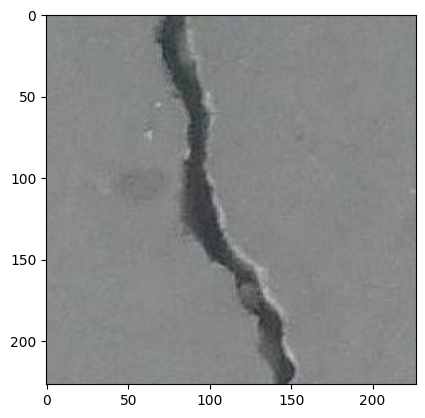

In [16]:
plt.imshow(imread(pos_tower))

In [18]:
os.listdir(train_path+'negative')[0]

'train-neg (1).jpg'

In [19]:
neg_tower = train_path+'negative\\'+'train-neg (1).jpg'

In [20]:
neg_tower

'C:\\Users\\eartnan\\OneDrive - Ericsson\\Desktop\\Ericsson Content\\Crack image samples\\train\\negative\\train-neg (1).jpg'

In [21]:
neg_tower = imread(neg_tower)

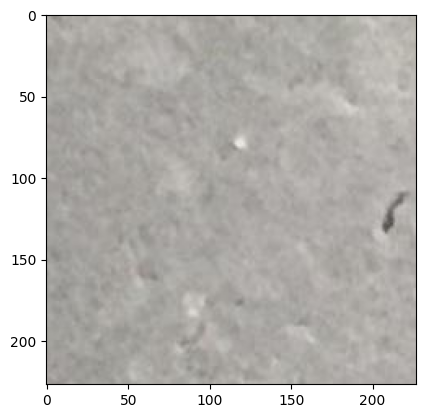

In [22]:
plt.imshow(neg_tower)

In [24]:
len(os.listdir(train_path+'positive'))

16000

In [25]:
len(os.listdir(train_path+'negative'))

16000

In [26]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'negative'):
    
    img = imread(test_path+'negative\\'+image_filename)
    d1,d2,colours = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [32]:
np.mean(dim1)

227.0

In [33]:
np.mean(dim2)

227.0

In [34]:
image_shape = (227,227,3)

In [35]:
227*227*3

154587

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
#help(ImageDataGenerator)

In [46]:
imread(pos_tower).max()

26

In [67]:
image_gen = ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.05, 
                               height_shift_range=0.05, 
                               rescale=1./255,  
                               shear_range=0.05, 
                               zoom_range=0.05, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

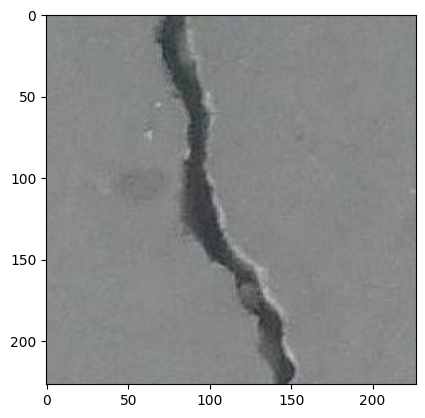

In [68]:
pos_image = imread(pos_tower)
plt.imshow(pos_image)

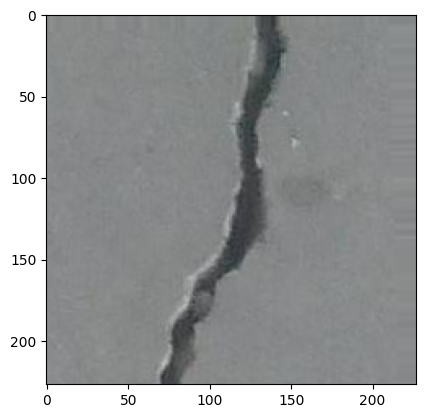

In [70]:
plt.imshow(image_gen.random_transform(pos_image))

In [71]:
image_gen.flow_from_directory(train_path)

Found 32000 images belonging to 2 classes.


In [72]:
image_gen.flow_from_directory(test_path)

Found 4000 images belonging to 2 classes.


In [73]:
from tensorflow.keras.models import Sequential


In [76]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [77]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [79]:
from tensorflow.keras.callbacks import EarlyStopping


In [80]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [81]:
batch_size = 16

In [83]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size =batch_size,
                                               class_mode='binary')

Found 32000 images belonging to 2 classes.


In [84]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size =batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 4000 images belonging to 2 classes.


In [85]:
train_image_gen.class_indices

{'negative': 0, 'positive': 1}

In [86]:
results = model.fit_generator(train_image_gen,epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

C:\Users\eartnan\AppData\Local\Temp\ipykernel_22068\849783731.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=20,


Epoch 1/20
2000/2000 [==============================] - 1281s 640ms/step - loss: 0.1298 - accuracy: 0.9591 - val_loss: 0.0617 - val_accuracy: 0.9730
Epoch 2/20
2000/2000 [==============================] - 1218s 609ms/step - loss: 0.0526 - accuracy: 0.9843 - val_loss: 0.0703 - val_accuracy: 0.9785
Epoch 3/20
2000/2000 [==============================] - 1279s 640ms/step - loss: 0.0398 - accuracy: 0.9889 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 4/20
2000/2000 [==============================] - 1225s 612ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0269 - val_accuracy: 0.9908
Epoch 5/20
2000/2000 [==============================] - 1201s 601ms/step - loss: 0.0309 - accuracy: 0.9909 - val_loss: 0.0318 - val_accuracy: 0.9890
Epoch 6/20
2000/2000 [==============================] - 1223s 611ms/step - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0338 - val_accuracy: 0.9910


In [88]:
model.evaluate(test_image_gen)

250/250 [==============================] - 59s 236ms/step - loss: 0.0287 - accuracy: 0.9920


[0.028661316260695457, 0.9919999837875366]

In [103]:
from tensorflow.keras.models import load_model
model.save('FINAL PROJECT.h5')

In [106]:
pred = model.predict_generator(test_image_gen)

C:\Users\eartnan\AppData\Local\Temp\ipykernel_22068\2032896581.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [118]:
predictions = pred>0.90

In [119]:
predictions


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [120]:
len(pred)

4000

In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [122]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2000
           1       1.00      0.97      0.99      2000

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [123]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1999,    1],
       [  53, 1947]], dtype=int64)

In [124]:
pos_tower

'C:\\Users\\eartnan\\OneDrive - Ericsson\\Desktop\\Ericsson Content\\Crack image samples\\train\\positive\\train-pos (1).jpg'

In [125]:
from tensorflow.keras.preprocessing import image

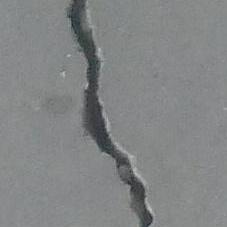

In [126]:
image.load_img(pos_tower)